In [77]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px
import plotly

import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Let's try clustering

In [55]:
customers_scaled = pd.read_csv('../data/customers_scaled.csv', index_col=0)
customers_scaled

,income,age,years_with_bank,nbr_children,Albuquerque,Anaheim,Arlington,Atlanta,Austin,Baltimore,...,Seattle,St Louis,St Paul,Tampa,Toledo,Tucson,Tulsa,Virginia Beach,Washington,Wichita
0,0.181399,0.434211,0.555556,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.045818,0.763158,0.111111,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.128665,0.328947,0.888889,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.330667,0.539474,0.333333,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.309066,0.605263,1.000000,0.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743,0.183043,0.565789,0.666667,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,0.425231,0.486842,0.000000,0.4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0.104747,0.315789,0.777778,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# kmeans first

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()


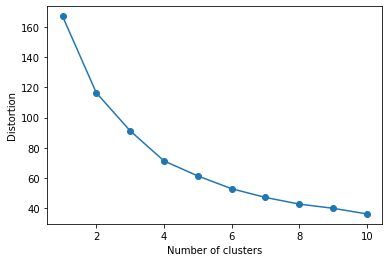

In [57]:
plot_distortion(customers_scaled.iloc[:,:4], max_clusters = 10)

In [58]:
# # set up k_means params
# km = KMeans(n_clusters=4,
#             n_init=10,
#             random_state=0)

In [59]:
# # fit and predict
# y_km = km.fit_predict(customers_scaled.iloc[:,:4])
# y_km

In [60]:
# customers_scaled['cluster_nogeo'] = y_km
# customers_scaled

In [61]:
# radar_scaled = customers_scaled.groupby('cluster_nogeo').mean()
# radar_scaled

In [62]:
def plotRadarChart(data,title):
    temp_list = []
    for i in range(len(data)):
        temp_list.append(go.Scatterpolar(
                                        r=data.iloc[i,:4].values,
                                        theta=data.columns[:4],
                                        name=str(data.index[i]),
                                        fill='toself'
        ))

    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                        showlegend = True, title=title)     
    fig = go.Figure(data = temp_list, layout = layout)     
    fig.show()

In [101]:
def scatterPlot(data,title):
    fig = px.scatter(data, x="PC1", y="PC2", color='cluster',title=title + str(n))
    fig.show()

In [102]:
def clustering(data, n_clusters, title):
    # Set up clustering
    km = KMeans(n_clusters=n_clusters,
        n_init=10,
        random_state=0)

    # fit & predict the clusters
    y_km = km.fit_predict(data)
    y_km

    # assign clusters to observations
    data['cluster'] = y_km
    data

    # group up for a radar chart
    grouped_data = data.groupby('cluster').mean()
    grouped_data

    # plot the radar chart
    plotRadarChart(grouped_data, title)

In [197]:
def pcScatter2D(data,n, title):
    # Set up clustering
    km = KMeans(n_clusters=n,
        n_init=10,
        random_state=0)

    # fit & predict the clusters
    y_km = km.fit_predict(data)
    y_km

    # PCA to 2D
    pca = PCA(n_components=2)
    pca_fit = pca.fit(data)
    pca_fit

    # Column Titles
    pc_columns = []
    for component in range(2):
        pc_columns.append('PC' + str(component+1))

    #make PC dataframe
    principal_components = pd.DataFrame(pca.fit_transform(data), 
                                    columns=pc_columns)

    # append k-means cluster to PC dataframe
    principal_components['cluster'] = y_km

    # plot the 2D scatter
    scatterPlot(principal_components, title)

In [198]:
for n in list(range(3,10)):
    clustering(customers_scaled.iloc[:,:4],n,"Demographic Clusters "+str(n))

In [200]:
for n in list(range(3,10)):
    pcScatter2D(customers_scaled.iloc[:,:4],n,"Demographic Clusters ")
    

In [201]:
def dbScanScatter(data,n,eps,title):
    # Set up clustering w DBSCAN
    km = DBSCAN(eps=eps,
        min_samples=n,
        metric='euclidean')

    # fit & predict the clusters
    y_km = km.fit_predict(data)
    y_km

    # Column Titles
    pc_columns = []
    for component in range(2):
        pc_columns.append('PC' + str(component+1))

    # PCA to 2D
    pca = PCA(n_components=2)
    pca_fit = pca.fit(data)
    pca_fit

    #make PC dataframe
    principal_components = pd.DataFrame(pca.fit_transform(data), 
                                    columns=pc_columns)

    # append dbscan cluster to PC dataframe
    principal_components['cluster'] = y_km

    if (5 < principal_components['cluster'].nunique()) & (principal_components['cluster'].nunique() < 12):
        # plot the 2D scatter
        scatterPlot(principal_components, title)

In [202]:
# run DBscan on all features
eps=0.005
for n in list(range(2,100)):
    dbScanScatter(customers_scaled.iloc[:,:4],6,eps,"Demographic Clusters ")
    eps += 0.005


# Let's try and use the geo data

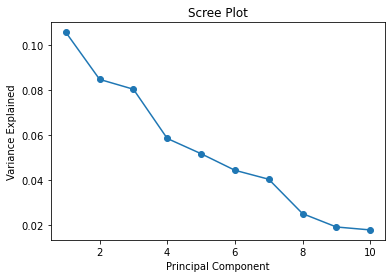

In [ ]:


# We need PCA to make the cities usable, how many PCs?

def screePlot(data, n_components=10):
    pca = PCA(n_components=n_components)
    pca_fit = pca.fit(data)
    pca_fit

    PC_values = np.arange(pca.n_components_) + 1
    PC_values

    plt.plot(PC_values, pca.explained_variance_ratio_, 'o-')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')

screePlot(customers_scaled.iloc[:,:-1])

In [ ]:
# plot with 8 PCs

n_components = 8

pca = PCA(n_components=n_components)
pc_columns = []
for component in range(n_components):
    pc_columns.append('PC' + str(component+1))
        
principal_components = pd.DataFrame(pca.fit_transform(customers_scaled.iloc[:,:-1]), 
                                    columns=pc_columns)
principal_components


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.043771,-0.010051,-0.191400,-0.062500,-0.027578,0.081357,-0.055842,-0.042329
1,-0.496237,0.531341,0.470685,-0.017033,0.492118,-0.223359,-0.068286,0.046916
2,-0.512153,0.832724,0.040913,0.126180,-0.156265,-0.204101,0.101001,0.021507
3,-0.510294,0.615092,0.375189,0.058901,0.280974,-0.147914,0.012329,0.032344
4,0.843438,0.552441,-0.263064,0.211224,-0.037347,0.289354,0.135915,-0.027609
...,...,...,...,...,...,...,...,...
742,-0.530898,0.713078,0.228925,0.138835,-0.102261,-0.032633,0.077487,0.004970
743,0.838458,0.377219,-0.007623,0.122951,0.032441,0.068046,0.066760,0.000101
744,-0.069044,-0.276427,0.227300,-0.079426,0.279915,0.327437,-0.128339,-0.064236
745,-0.038148,0.076283,-0.327882,-0.072821,-0.228485,-0.133573,-0.027191,-0.026433


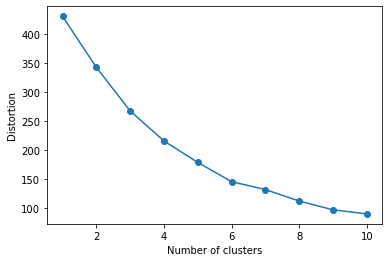

In [ ]:
plot_distortion(principal_components, max_clusters = 10)

In [ ]:
# set up k_means params
km = KMeans(n_clusters=4,
            n_init=10,
            random_state=0)

In [ ]:
y_km = km.fit_predict(principal_components)
y_km

array([0, 2, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 3, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 2, 1,
       0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 3, 0, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 3, 2,
       0, 1, 0, 2, 0, 0, 0, 1, 3, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0,
       0, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 0, 0,
       0, 1, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 3, 0, 0,
       0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 0,
       3, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 3, 0, 0, 3, 1, 0, 3, 1, 0,

In [ ]:
principal_components['cluster_wgeo'] = y_km
principal_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,cluster_wgeo
0,-0.043771,-0.010051,-0.191400,-0.062500,-0.027578,0.081357,-0.055842,-0.042329,0
1,-0.496237,0.531341,0.470685,-0.017033,0.492118,-0.223359,-0.068286,0.046916,2
2,-0.512153,0.832724,0.040913,0.126180,-0.156265,-0.204101,0.101001,0.021507,2
3,-0.510294,0.615092,0.375189,0.058901,0.280974,-0.147914,0.012329,0.032344,2
4,0.843438,0.552441,-0.263064,0.211224,-0.037347,0.289354,0.135915,-0.027609,1
...,...,...,...,...,...,...,...,...,...
742,-0.530898,0.713078,0.228925,0.138835,-0.102261,-0.032633,0.077487,0.004970,2
743,0.838458,0.377219,-0.007623,0.122951,0.032441,0.068046,0.066760,0.000101,1
744,-0.069044,-0.276427,0.227300,-0.079426,0.279915,0.327437,-0.128339,-0.064236,0
745,-0.038148,0.076283,-0.327882,-0.072821,-0.228485,-0.133573,-0.027191,-0.026433,0


In [ ]:
radar_scaled_pca = principal_components.groupby('cluster_wgeo').mean()
radar_scaled_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
cluster_wgeo,,,,,,,,
0,-0.055377,-0.101407,-0.087082,-0.123563,-0.019812,0.025034,-0.027618,-0.006193
1,0.820482,0.234848,0.215329,0.093423,-0.006339,-0.008594,0.040339,0.008427
2,-0.531080,0.622335,0.369468,0.108203,0.050136,-0.043052,0.043800,0.012308
3,-0.135890,-0.422768,-0.139518,0.797305,0.115965,-0.147921,0.114737,0.023084
